In [ ]:
from glob import glob

In [ ]:
data=('/content/drive/MyDrive/Cars Dataset/Cars Dataset/train')
image=glob(data+'/*')
image

['/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Audi',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Hyundai Creta',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Mahindra Scorpio',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Swift',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Rolls Royce',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Tata Safari',
 '/content/drive/MyDrive/Cars Dataset/Cars Dataset/train/Toyota Innova']

In [ ]:
Toyota_Innova = list(glob(data + '/Toyota Innova/*'))[:200]
Tata_Safari = list(glob(data + '/Tata Safari/*'))[:200]
Swift =list(glob(data + "/Swift/*"))[:200]
Rolls_Royce =list(glob(data + '/Rolls Royce/*'))[:200]
Mahindra_Scorpio =list(glob(data + '/Mahindra Scorpio/*'))[:200]
Hyundai_Creta =list(glob(data + '/Hyundai Creta/*'))[:200]
Audi=list(glob(data+'/Audi/*'))[:200]


In [ ]:
len(Toyota_Innova)

200

In [ ]:
input = {'Toyota Innova':Toyota_Innova,'Tata Safari':Tata_Safari,'Swift':Swift,'Rolls Royce':Rolls_Royce,'Mahindra Scorpio':Mahindra_Scorpio,'Hyundai Creta':Hyundai_Creta, 'Audi':Audi}
output = {'Toyota Innova': 0, 'Tata Safari': 1, 'Swift': 2, 'Rolls Royce': 3, 'Mahindra Scorpio': 4, 'Hyundai Creta': 5, 'Audi': 6}

In [ ]:
len(input)

7

In [ ]:
output

{'Toyota Innova': 0,
 'Tata Safari': 1,
 'Swift': 2,
 'Rolls Royce': 3,
 'Mahindra Scorpio': 4,
 'Hyundai Creta': 5,
 'Audi': 6}

In [ ]:
import cv2
import os
import numpy as np
x=[]
y=[]
for cars in input:
  path_lst=input[cars]
  for data in path_lst:
    img_arr=cv2.imread(data)
    img_arr_resize=cv2.resize(img_arr,(224,224))
    img_arr_resize=img_arr_resize/255
    img_arr_resize=img_arr_resize.reshape(224,224,3,1)
    x.append(img_arr_resize)
    y.append(output[cars])
    test=np.array(x)
    train=np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(test)

[[[[[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   ...

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]]


  [[[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   ...

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]]


  [[[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   ...

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]

   [[1.        ]
    [1.        ]
    [1.        ]]]


  ...


  [[[1. 

In [ ]:
print(train)

[0 0 0 ... 6 6 6]


In [ ]:
np.asarray(x_train).shape

(1120, 224, 224, 3, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv3D,MaxPool3D,BatchNormalization,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()

In [ ]:
model=Sequential()
model.add(Conv3D(filters=20,kernel_size=(2,2,3),input_shape=(224,224,3,1)))
model.add(Conv3D(filters=10,kernel_size=(2,2,1),activation='relu'))
model.add(Flatten())
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=10,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 223, 223, 1, 20)   260       
                                                                 
 conv3d_1 (Conv3D)           (None, 222, 222, 1, 10)   810       
                                                                 
 flatten (Flatten)           (None, 492840)            0         
                                                                 
 dense (Dense)               (None, 30)                14785230  
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 14786610 (56.41 MB)
Trainable params: 14786610 (56.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['Accuracy'])

In [ ]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)


In [ ]:
np.asarray(y_train).shape

(1120,)

In [ ]:
np.asarray(x_train).shape

(1120, 224, 224, 3, 1)

In [ ]:
a=model.fit(x=x_train,y=y_train,batch_size=50,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
23/23 [==============================] - 14s 261ms/step - loss: 6.1769 - Accuracy: 0.2062 - val_loss: 1.9894 - val_Accuracy: 0.2250
Epoch 2/10
23/23 [==============================] - 2s 68ms/step - loss: 1.7536 - Accuracy: 0.3304 - val_loss: 1.9316 - val_Accuracy: 0.2321
Epoch 3/10
23/23 [==============================] - 2s 68ms/step - loss: 1.5273 - Accuracy: 0.4634 - val_loss: 1.9356 - val_Accuracy: 0.3000
Epoch 4/10
23/23 [==============================] - 2s 80ms/step - loss: 1.3058 - Accuracy: 0.5705 - val_loss: 1.8657 - val_Accuracy: 0.3143
Epoch 5/10
23/23 [==============================] - 2s 78ms/step - loss: 1.0332 - Accuracy: 0.6911 - val_loss: 1.8202 - val_Accuracy: 0.3643
Epoch 6/10
23/23 [==============================] - 2s 71ms/step - loss: 0.7987 - Accuracy: 0.8027 - val_loss: 1.9123 - val_Accuracy: 0.3714
Epoch 7/10
23/23 [==============================] - 2s 68ms/step - loss: 0.5961 - Accuracy: 0.8607 - val_loss: 1.8958 - val_Accuracy: 0.4286
Epoch 8/10


In [ ]:
t_a=a.history['Accuracy']
v_a=a.history['val_Accuracy']
t_l=a.history['loss']
v_l=a.history['val_loss']

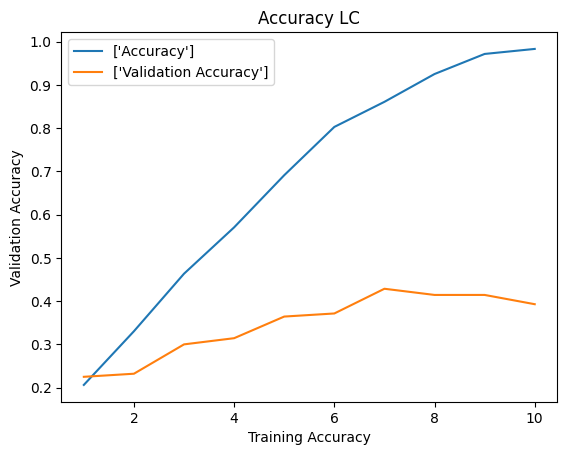

In [ ]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
import matplotlib.pyplot as plt
plt.plot(epoch,t_a,label=['Accuracy'])
plt.plot(epoch,v_a,label=['Validation Accuracy'])
plt.title('Accuracy LC')
plt.xlabel('Training Accuracy')
plt.ylabel('Validation Accuracy')
plt.legend()

Text(0, 0.5, 'Testing Loss')

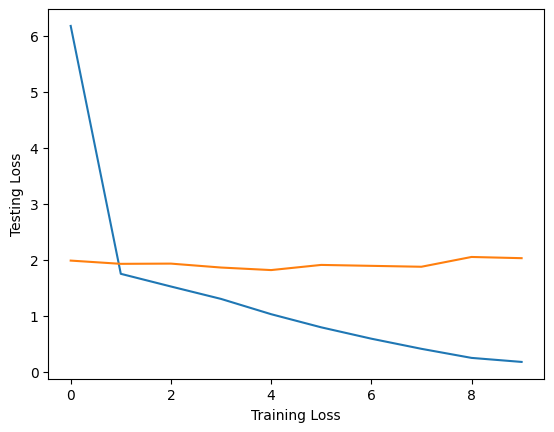

In [ ]:
t_loss=a.history['loss']
v_loss=a.history['val_loss']
t_acc=a.history['Accuracy']
v_acc=a.history['val_Accuracy']
epoch=a.epoch
plt.plot(epoch,t_loss,label=['Loss'])
plt.plot(epoch,v_loss,label=['Validation Loss'])
plt.xlabel('Training Loss')
plt.ylabel('Testing Loss')

In [ ]:
import numpy as np
import cv2
img_arr=cv2.imread('/content/drive/MyDrive/Cars Dataset/Cars Dataset/test/Audi/1003.jpg')
test_set=[]
img_arr_resize=cv2.resize(img_arr,(224,224))
np.max(img_arr_resize)
img_arr_resize=img_arr_resize/255
img_arr_resize=img_arr_resize.reshape(224,224,3,1)
test_set.append(img_arr_resize)
test=np.array(test_set)
test.shape
result=model.predict(test)
np.argmax(result)



1/1 [==============================] - 0s 17ms/step


4